In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

from configure import DATA_DIR
from src.load_data import load_data

In [63]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [64]:
# load data
df = load_data(DATA_DIR/'processed/fetal_health_clean.csv')

In [65]:
df.columns.to_list()


['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_number_of_zeroes',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance',
 'histogram_tendency',
 'fetal_health']

In [66]:
# Define features and target variable
X = df.drop(['fetal_health'], axis = 1)
y = df['fetal_health']

In [67]:
from src.baseline import escalar_features
# Setting up a standard scaler for the features and analyzing it thereafter
X_scaled = escalar_features(X)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2113.0,-1.143325e-15,1.000237,-2.776252,-0.742724,-0.030989,0.680746,2.714274
accelerations,2113.0,6.725440e-18,1.000237,-0.823776,-0.823776,-0.307036,0.726444,4.085254
fetal_movement,2113.0,-1.345088e-17,1.000237,-0.203392,-0.203392,-0.203392,-0.139280,10.075993
uterine_contractions,2113.0,8.070528e-17,1.000237,-1.492245,-0.811961,0.208464,0.888747,3.609880
light_decelerations,2113.0,-8.070528e-17,1.000237,-0.641203,-0.641203,-0.641203,0.370643,4.418027
severe_decelerations,2113.0,-6.725440e-18,1.000237,-0.057653,-0.057653,-0.057653,-0.057653,17.345234
prolongued_decelerations,2113.0,4.035264e-17,1.000237,-0.269640,-0.269640,-0.269640,-0.269640,8.183605
abnormal_short_term_variability,2113.0,-1.345088e-17,1.000237,-2.037640,-0.873069,0.116815,0.815557,2.329499
mean_value_of_short_term_variability,2113.0,-4.035264e-17,1.000237,-1.283731,-0.718221,-0.152712,0.412798,6.407199
percentage_of_time_with_abnormal_long_term_variability,2113.0,2.690176e-17,1.000237,-0.534294,-0.534294,-0.534294,0.065725,4.429504


In [68]:
from sklearn.model_selection import train_test_split
# Splitting the training and test variables
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=25)

In [70]:
# Baseline Models - Modelos simples para establecer referencia

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score

# Pipelines de modelos baseline
pipeline_lr = Pipeline([('lr_classifier', LogisticRegression())])
pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier())])
pipeline_knn = Pipeline([('knn_classifier', KNeighborsClassifier())])

# Lista de pipelines baseline
baseline_pipelines = [pipeline_lr, pipeline_dt, pipeline_knn]

# Diccionario para baseline
baseline_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'KNN'}

# Entrenar modelos baseline
for pipe in baseline_pipelines:
    pipe.fit(X_train, y_train)

In [71]:
# Evaluando modelos baseline
baseline_results = []
for i, model in enumerate(baseline_pipelines):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    baseline_results.append([baseline_dict[i], train_score, test_score, f1, recall])
    
baseline_df = pd.DataFrame(baseline_results, columns=['Model', 'Train Score', 'Test Score', 'F1 Score', 'Recall Score'])
baseline_df = baseline_df.round(4)
print("=" * 70)
print("RESULTADOS BASELINE MODELS")
print("=" * 70)
print(baseline_df.sort_values(by='Test Score', ascending=False))
print("\n")

# Identificar mejor baseline
best_idx = baseline_df['Test Score'].idxmax()
best_model_name = baseline_df.loc[best_idx, 'Model']
print(f"🏆 Mejor Baseline Model: {best_model_name}")
print(f"📊 Test Score: {baseline_df.loc[best_idx, 'Test Score']:.4f}")

RESULTADOS BASELINE MODELS
                 Model  Train Score  Test Score  F1 Score  Recall Score
1        Decision Tree       0.9994      0.9031    0.9045        0.9031
2                  KNN       0.9308      0.8700    0.8638        0.8700
0  Logistic Regression       0.8692      0.8511    0.8364        0.8511


🏆 Mejor Baseline Model: Decision Tree
📊 Test Score: 0.9031


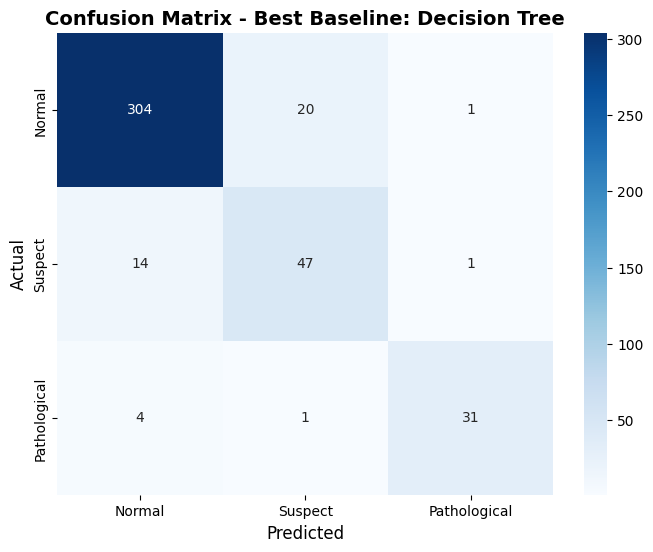

In [72]:
# Matriz de confusión del mejor baseline
best_model = baseline_pipelines[best_idx]
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Suspect', 'Pathological'], 
            yticklabels=['Normal', 'Suspect', 'Pathological'])
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.title(f'Confusion Matrix - Best Baseline: {best_model_name}', fontsize=14, fontweight='bold')
plt.show()

## 📋 Conclusiones - Baseline Models

**Baseline Models Evaluados:**
- Logistic Regression
- Decision Tree
- KNN

**Resultado:**
- Mejor baseline: [Completar después de ejecutar]
- Test Score: [Completar]
- F1 Score: [Completar]

**Observaciones:**
- Modelos simples establecen performance mínima
- Rápidos de entrenar
- Interpretables y fáciles de explicar

**Next Steps:**
- ✅ Baseline establecido
- ⏭️ Proceder con ensemble_models.ipynb para mejorar performance
- Guardar resultados baseline para comparación

In [73]:
# Guardar resultados baseline para comparación en ensemble_models.ipynb
baseline_df.to_csv(DATA_DIR / 'processed' / 'baseline_results.csv', index=False)
print(f"Resultados guardados en: {DATA_DIR / 'processed' / 'baseline_results.csv'}")

Resultados guardados en: /Users/ciprian/Desktop/factoria/projects/Equipo_4_Proyecto_VII_Modelos_de_ensemble/data/processed/baseline_results.csv
